# Testis Compare Clusters

In [67]:
import os
import sys
from pathlib import Path
import itertools

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb, Seurat
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook('2018-03-13_testis_compare_clusters')

last updated: 2018-03-13 
Git hash: d8510e35fc76d75cd102a5a605d444ec8b933997


In [82]:
t1 = Seurat(path='../output/testis1_scRNAseq_3k')
t3 = Seurat(path='../output/testis3_scRNAseq_8k')

In [79]:
vg1 = t1.get_var_genes()
vg3 = t3.get_var_genes()

In [80]:
norm1 = t1.get_normalized_read_counts()
norm3 = t3.get_normalized_read_counts()

In [117]:
clus1 = t1.get_clusters()['res.0.4']
clus3 = t3.get_clusters()['res.0.4']

In [92]:
genes = list(set(vg1).intersection(set(vg3)))

In [118]:
X = norm1.loc[genes, :].T
Y = clus1.loc[X.index]

In [119]:
X3 = norm3.loc[genes].T
Y3 = clus3.loc[X3.index]

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [96]:
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

pca = PCA(n_components=30).fit(X_std)
X_reduced = pca.transform(X_std)

In [97]:
X3_std = scaler.transform(X3)
X3_reduced = pca.transform(X3_std)

In [98]:
from sklearn.svm import SVC

In [99]:
svm = SVC(kernel='rbf')

In [126]:
svm.fit(X_std, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
y_pred = svm.predict(X3_std)

In [102]:
from sklearn.metrics import confusion_matrix

In [128]:
cm = confusion_matrix(Y3, y_pred)

In [129]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


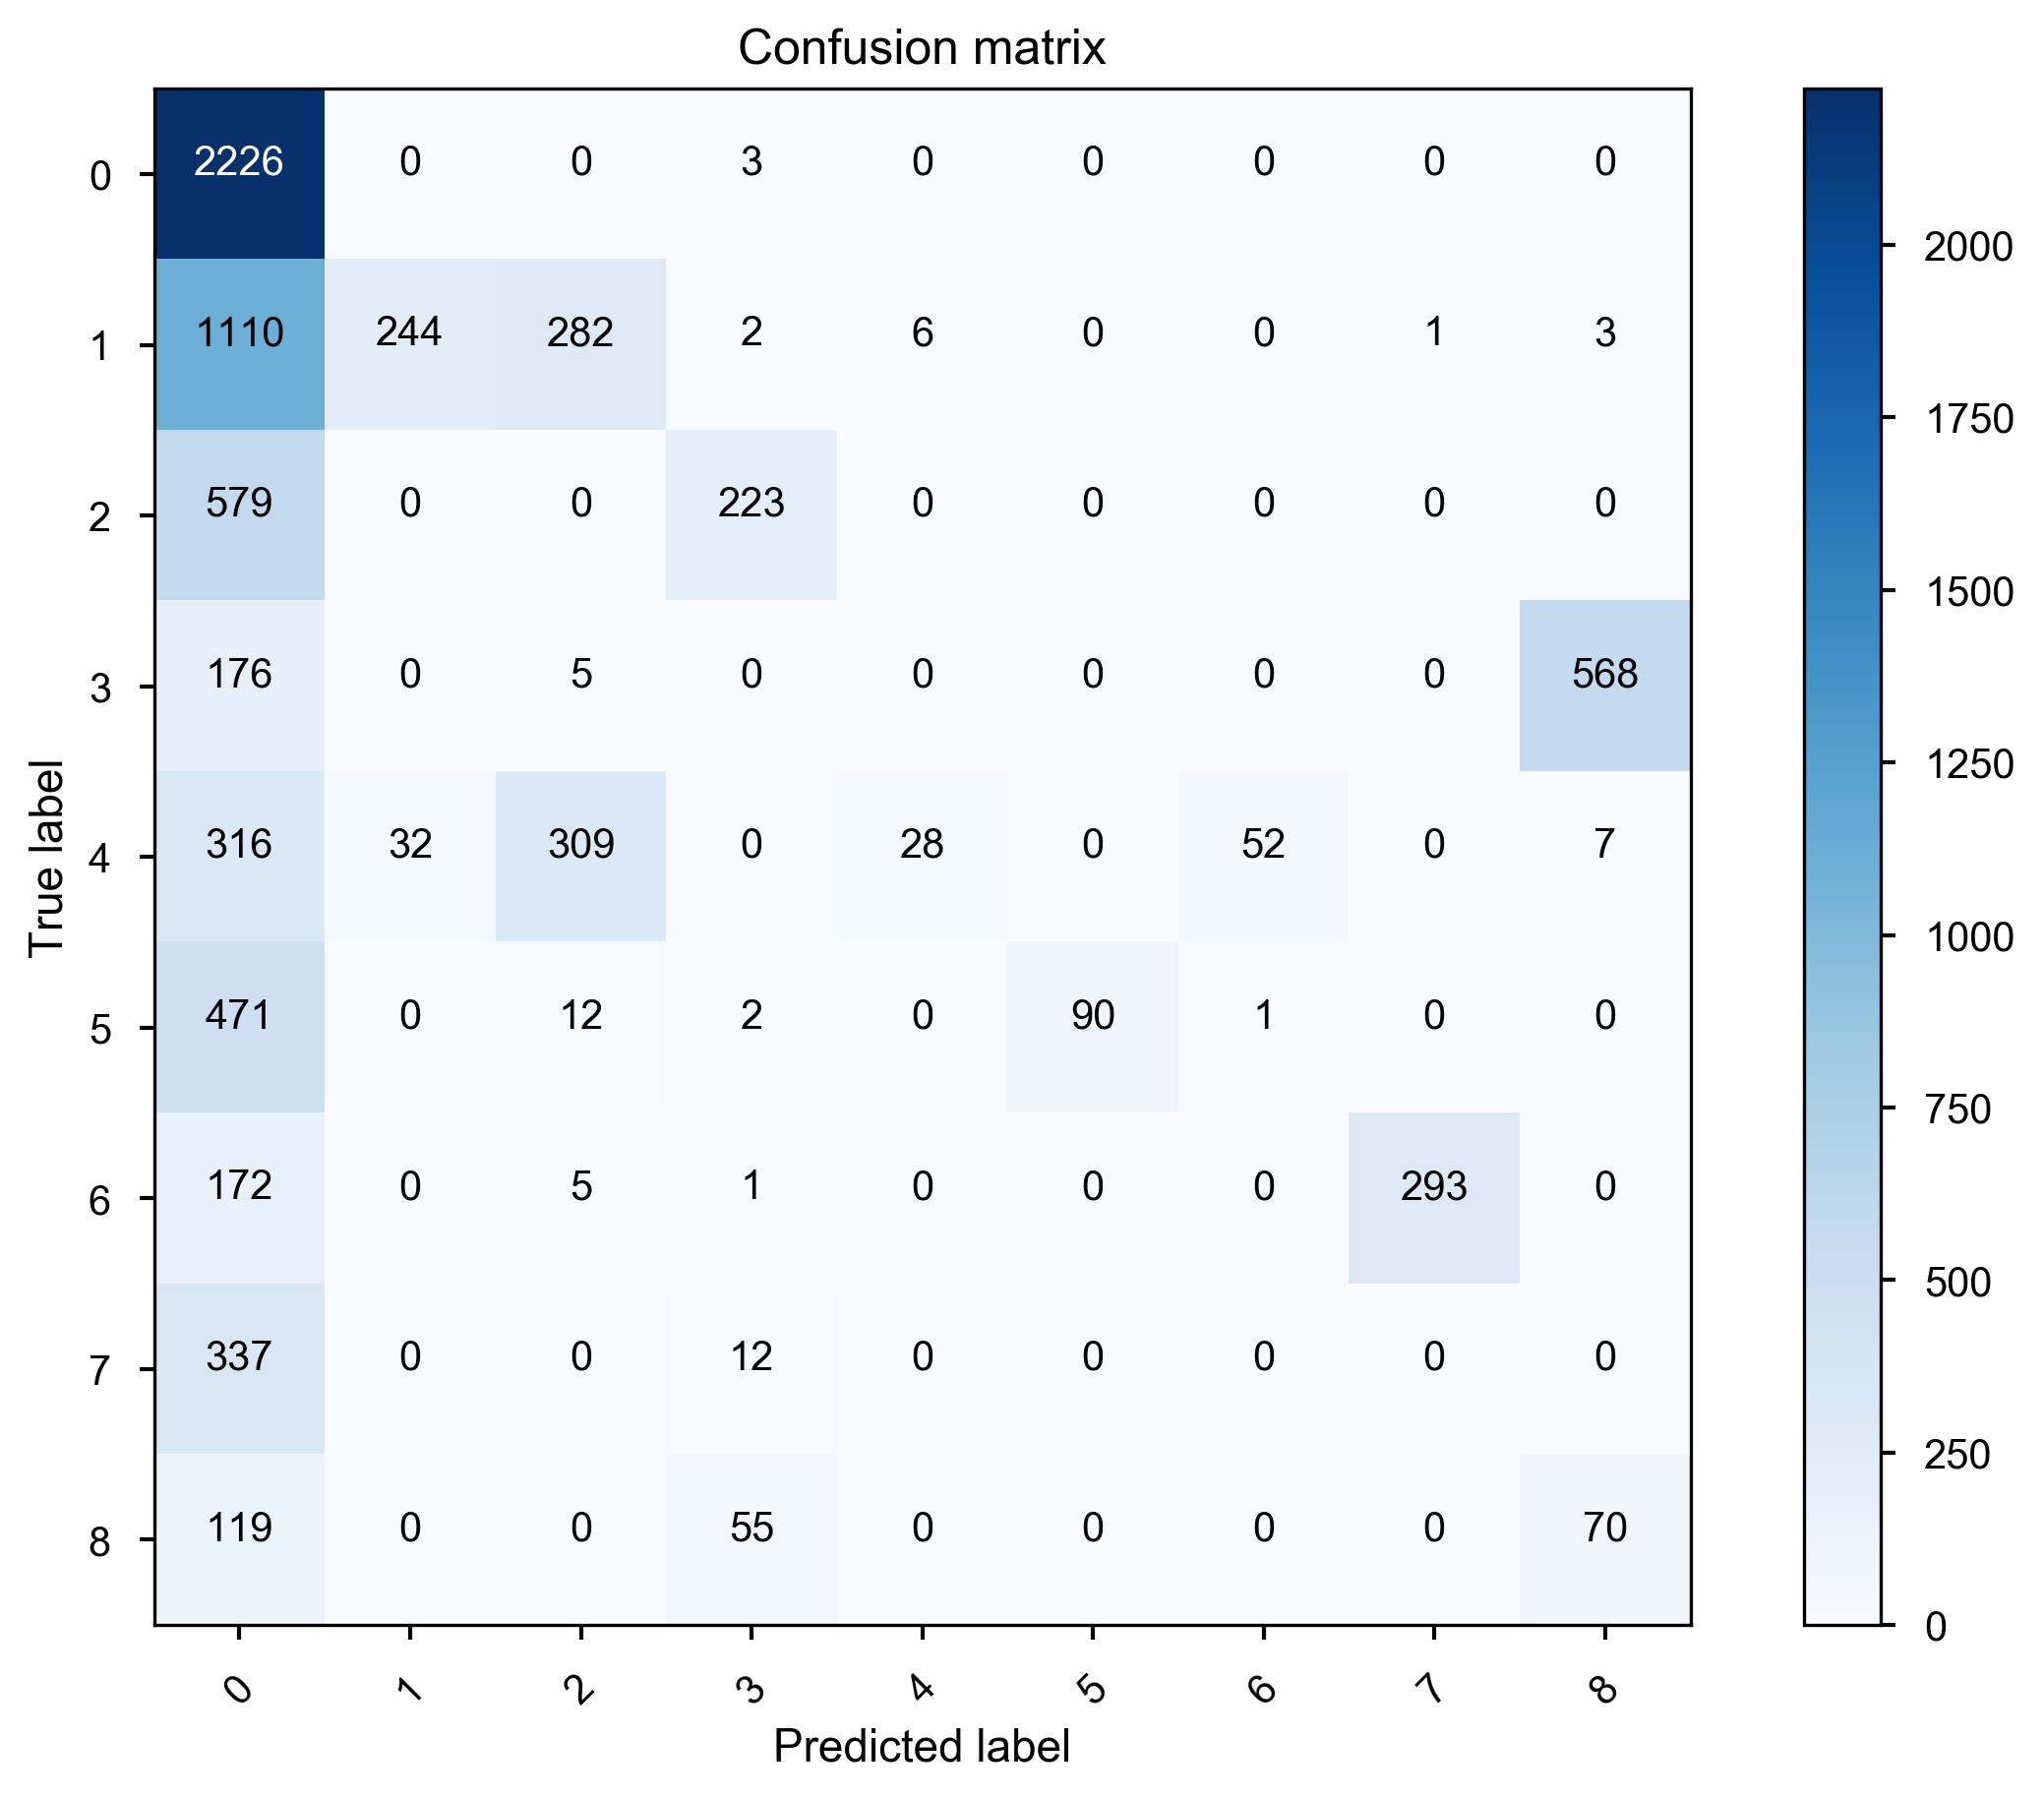

In [130]:
plot_confusion_matrix(cm, list(range(9)))

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier()

In [138]:
knn.fit(X_reduced, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [139]:
y_pred = knn.predict(X3_reduced)

In [140]:
cmKnn = confusion_matrix(Y3, y_pred)

Confusion matrix, without normalization


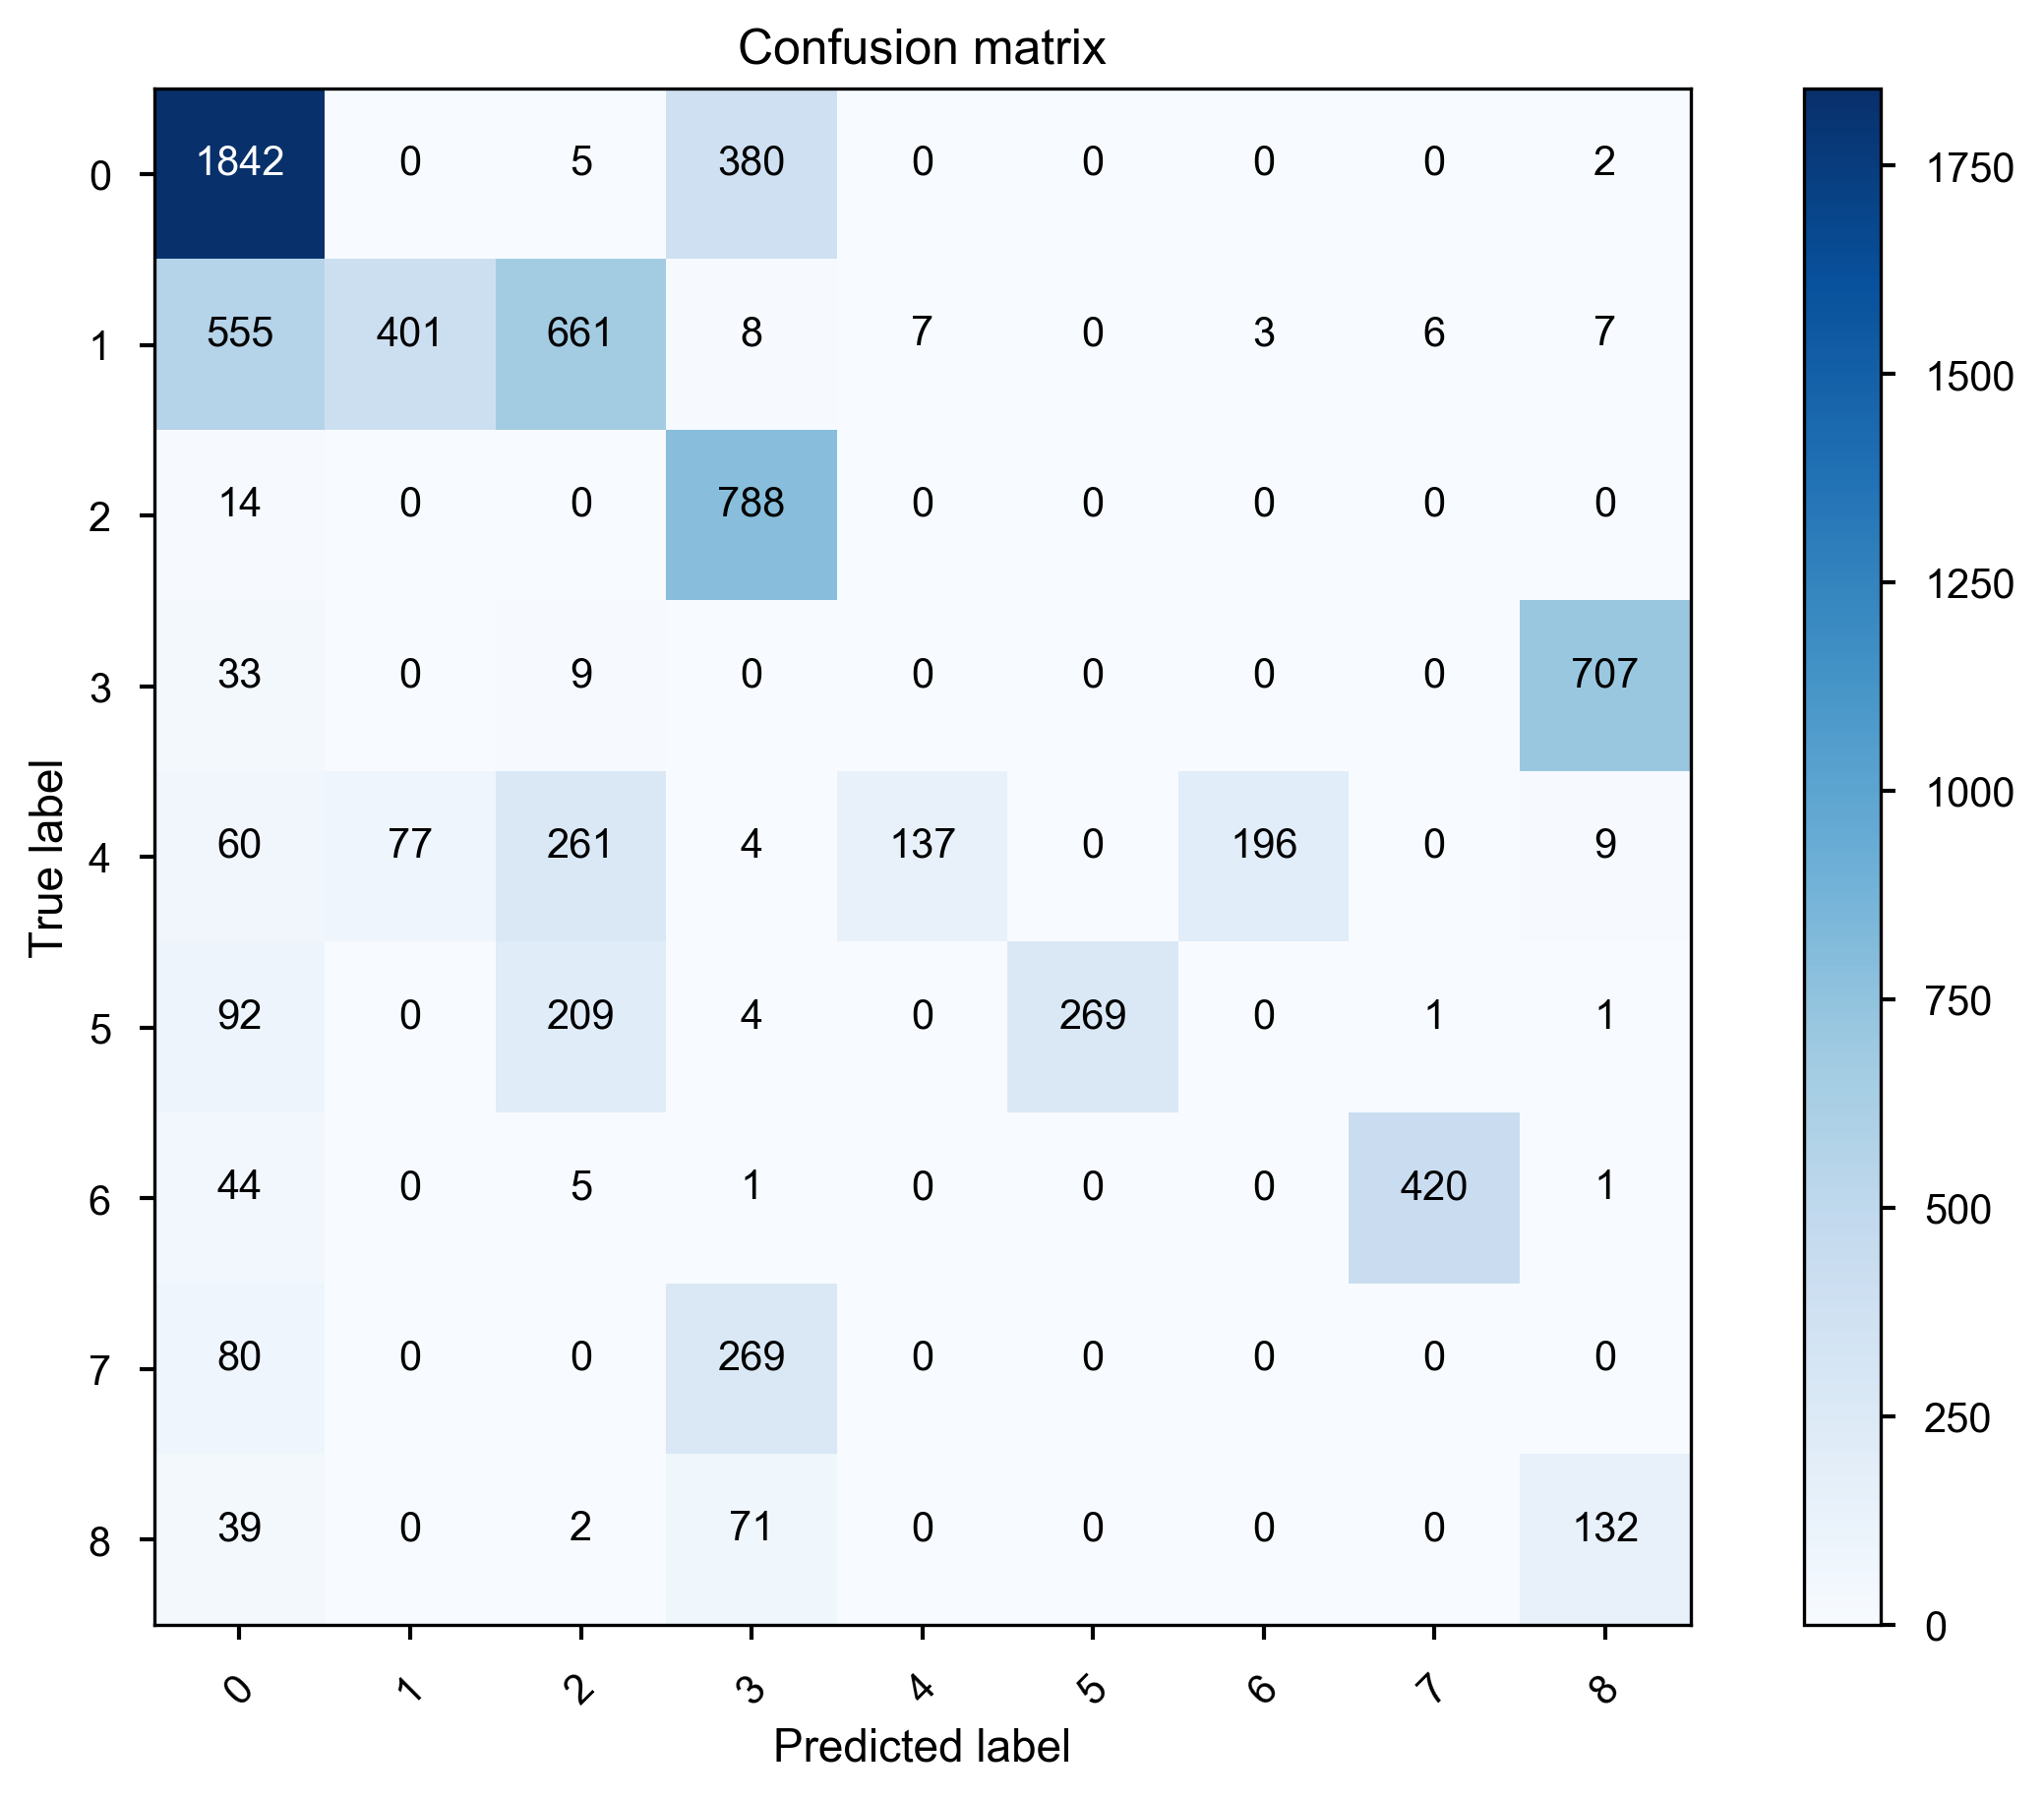

In [141]:
plot_confusion_matrix(cmKnn, list(range(9)))